If you're running this notebook through the IJulia notebook command, you'll need
to run `Pkg.add("Conda"); using Conda; Conda.add("numpy"); Conda.add("matplotlib")` before running this notebook.

In [38]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [39]:
a1 = 1
b1 = -1
a2 = 2
b2 = 1
def LotkaVolterra(t,y,dy=None):
    if dy is None:
        dy = np.zeros_like(y)
    dy[0] = (a1 + b1*y[1])*y[0]
    dy[1] = (a2 + b2*y[0])*y[1]
    return dy

This function can either be used to calculate `dy` in place:

In [40]:
y = np.zeros((2,1))
dy = np.ones((2, 1))
LotkaVolterra(0, y, dy)
print(dy)

[[0.]
 [0.]]


It will also return the differential `dy` if you'd prefer to use it that way:

In [41]:
dy2 = LotkaVolterra(0, y)
print(dy2)
assert np.all(dy == dy2) # Should be true.

[[0.]
 [0.]]


Euler's Method is nearly trivial to code up. Note that the output `yOut` is a matrix with `Nt` rows and `nx0=len(x0)` columns; each row is an output state. 

In [62]:
def Euler(df, x0, t0, dt, Nt):
    nx0 = len(x0)
    yOut = np.empty((Nt, nx0))
    tOut = np.empty(Nt)
    yOut[0, :] = x0
    tOut[0] = t0
    t = t0
    for i in np.arange(1, Nt):
        t += dt
        x0 += dt*df(t, x0)
        yOut[i, :] = x0
        tOut[i] = t
    return tOut, yOut

x0 = np.array([1.0, 1.0])
t0 = 0.0
dt = 1e-2
Nt = 100
ParamStr = 'a1=' + str(a1) + ', b1=' + str(b1) + ', a2=' + str(a2)+ ', b1=' + str(b1)
tOut, yOut = Euler(LotkaVolterra, np.copy(x0), t0, dt, Nt)

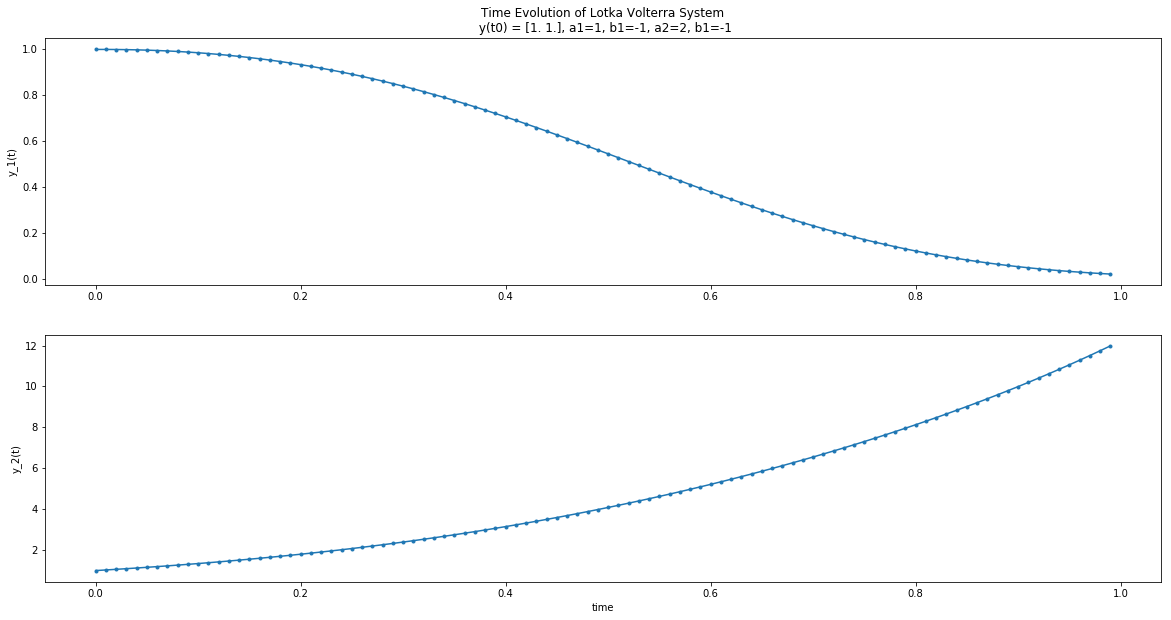

In [63]:
plt.figure(figsize=(20,10)) 
plt.subplot(2, 1, 1)
plt.plot(tOut, yOut[:, 0], '.-')
plt.title('Time Evolution of Lotka Volterra System\n y(t0) = ' + str(x0) + ', ' + ParamStr)
plt.ylabel('y_1(t)')

plt.subplot(2, 1, 2)
plt.plot(tOut, yOut[:, 1], '.-')
plt.xlabel('time')
plt.ylabel('y_2(t)')

plt.show()

Phase portraits for the system can be calculated and plot using Matplotlib as well, either as a "quiver" plot:

In [73]:
ny1 = 30
ny2 = 30
y1Vals = np.linspace(0,20,ny1)
y2Vals = np.linspace(0,20,ny2)
dy1Vals = np.empty((ny1, ny2))
dy2Vals = np.empty((ny2, ny2))
for (i, y1) in enumerate(y1Vals):
    for (j, y2) in enumerate(y2Vals):
        dy = LotkaVolterra(0, [y1, y2])
        dy1Vals[i, j] = dy[0]
        dy2Vals[i, j] = dy[1]

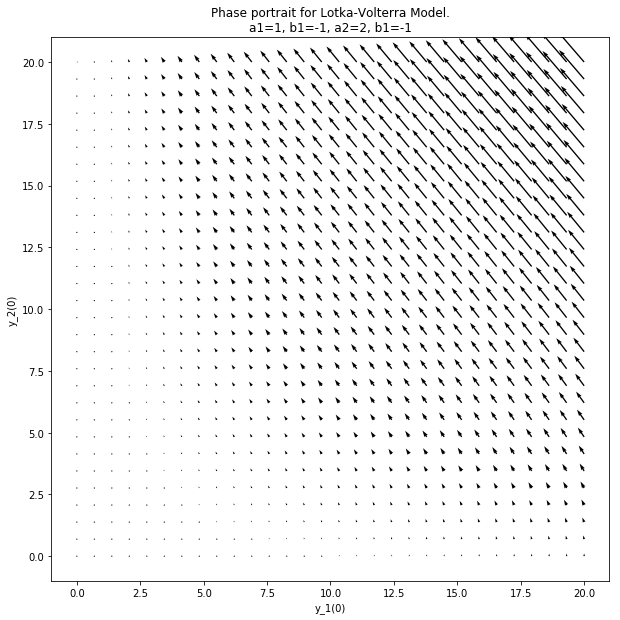

In [78]:
plt.figure(figsize=(10,10)) 
plt.quiver(y1Vals, y2Vals, dy1Vals, dy2Vals)
plt.xlabel('y_1(0)')
plt.ylabel('y_2(0)')
plt.title('Phase portrait for Lotka-Volterra Model.\n' + ParamStr)
plt.show()

If you're going to include a plot into a presentation or paper, you'd have to save it:

In [79]:
plt.savefig("LotkaVolterraPhasePortrait.png")

<Figure size 432x288 with 0 Axes>

Though it can lead to inconsistent information if you're not careful, your plots look better if you use the built-in titling and labeling features that are native to Tikz/PGF and LaTeX rather than using Matplotlib's functionality.

You can also generate a streamline plot (`quiver` and `streamplot`s allow you to more easily visualize different aspects of the ODE):

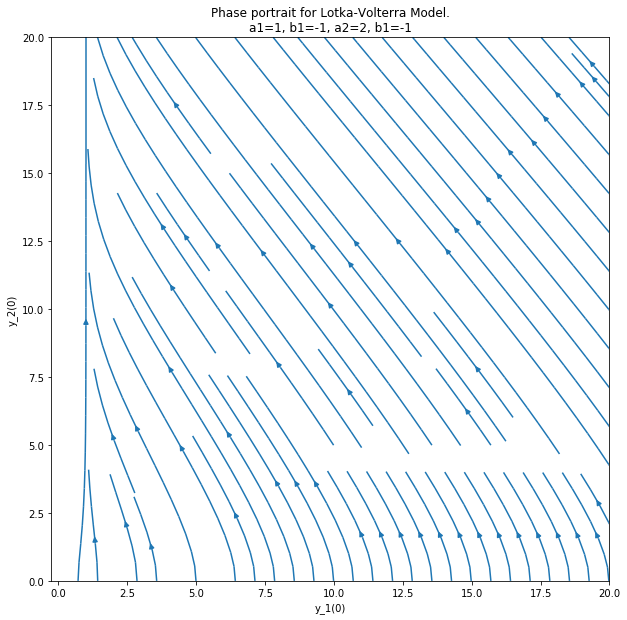

In [71]:
plt.figure(figsize=(10,10)) 
plt.streamplot(y1Vals, y2Vals, dy1Vals, dy2Vals)
plt.xlabel('y_1(0)')
plt.ylabel('y_2(0)')
plt.title('Phase portrait for Lotka-Volterra Model.\n' + ParamStr)
plt.show()